<a href="https://colab.research.google.com/github/snghynn/ESAA-YB/blob/main/BOOK_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_pg_290~319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 pg. 290 ~ 319(303~310 제외)

# Ch5. 회귀
## 1. 회귀 소개
- 회귀: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝 회귀 예측의 핵심: 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀계수를 찾아내는 것
- 회귀 유형 구분
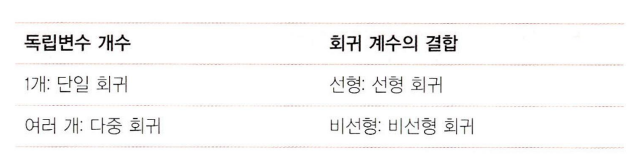

- 지도학습의 유형
  - 분류(Classification) : 예측값이 카테고리와 같은 이산형 클래스 값
  - 회귀(Regression) : 예측값이 연속형 숫자 값

- 선형 회귀 : 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식

- 대표적인 선형 회귀 모델
  - 일반 선형 회귀: 예측값과 실제값의 RSS 최소화, regularization 적용 x
  - 릿지: 선형 회귀에 L2 규제 추가
  - 라쏘: 선형 회귀에 L1 규제 추가. 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
  - 엘라스틱넷 : L1, L2 규제를 함께 결합한 모델. 피처가 많은 데이터 세트에서 적용됨. 
  - 로지스틱 회귀: 분류에 사용되는 선형 모델. 강력한 분류 알고리즘. 이진 분류뿐만 아니라 희소 영역의 분류(텍스트 분류)에서 뛰어난 예측 성능.

## 2. 단순 선형 회귀를 통한 회귀 이해
- 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 휘귀: 전체 데이터의 잔차 합이 최소가 되는 모델+오류값 합이 최소가 될 수 있는 최적의 회귀 계수 찾기

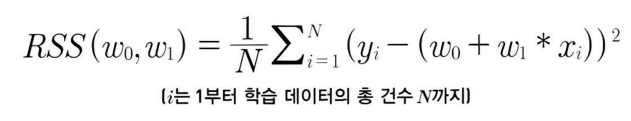
  - RSS: 비용(Cost)
  - w: 회귀 계수

## 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
- 경사 하강법: 고차원 방정식에 대한 문제를 해결해주면서 RSS를 최소화하는 방법 제공. 비용 함수가 최소화 되는 W 찾기
- 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이터하면서 오류 값이 최소가 되는 W 파라미터 구하기
- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향서응ㄹ 가지고 W 파라미터를 지속해서 보정


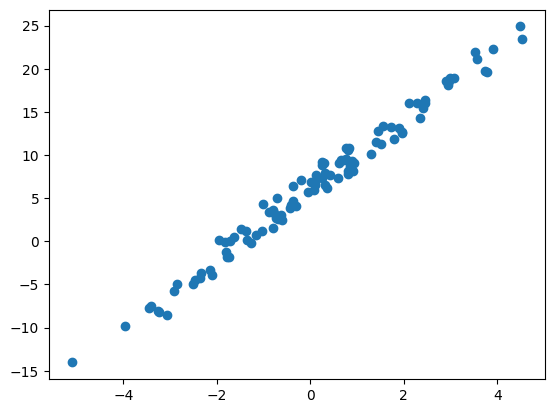

In [2]:
# 경사 하강법을 파이썬 코드로 구현
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X=2*np.random.randn(100,1)
y=6+4*X+np.random.randn(100,1)
#X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [3]:
# 비용 함수 정의: 실제 y값과 예측된 y값을 인자로 받아서 비용 계산
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [4]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N=len(y)
  #w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X, w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [5]:
# 입력 인자 inters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  
  return w1, w0

In [6]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1, w0=gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.057 w0:6.075
Gradient Descent Total Cost:1.0572


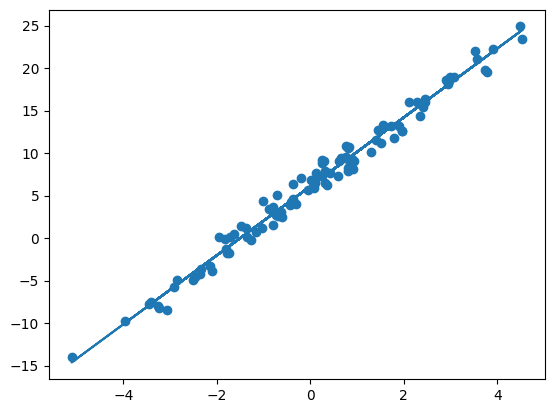

In [7]:
#y_pred에 기반해 회귀선 그리기
plt.scatter(X,y)
plt.plot(X, y_pred)

In [15]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0
  
  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1, w0

In [16]:
#w1, w0 및 예측 오류 비용 계산
w1, w0=stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000)
print('w1: ', round(w1[0,0], 3), 'w0:', round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.072 w0: 6.064
Stochastic Gradient Descent Total Cost:1.0582


> 예측 성능상의 큰 차이가 없음: 큰 데이터를 처리할 경우에는 경사 하강법은 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용


## 5. 다항 회귀와 과(대)적합/ 과소적합 이해
- 다항 회귀 역시 선형 회기: 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현
- PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환 

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]


PolynomialFeatures()

In [19]:
# 다항 계수 피처 값이 입력되면 결정 값 반환하는 함수
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [22]:
#3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [23]:
# 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 더 명료한 코드 작성법
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


- 다항 회귀의 차수를 높일수록 예측 정확도 떨어짐: 과적합

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


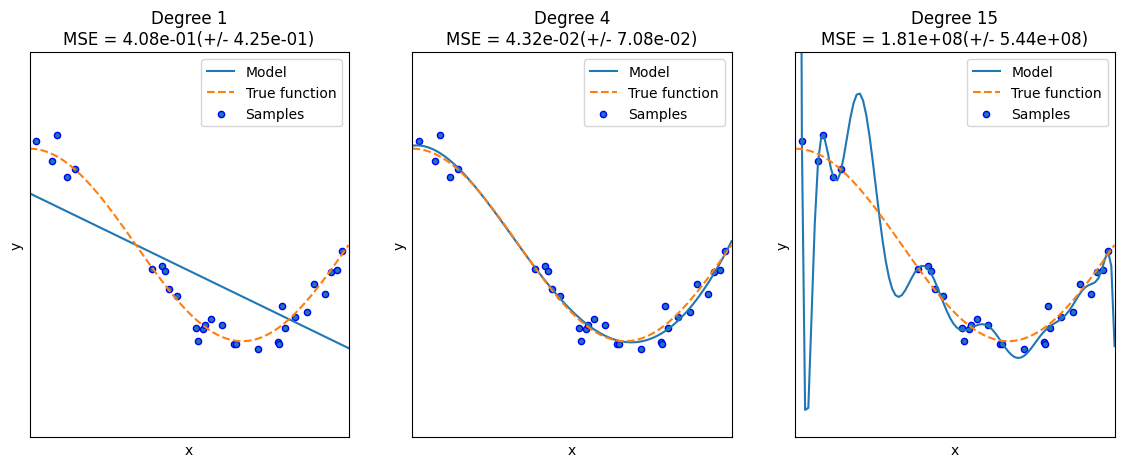

In [25]:

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교 
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### 편향-분산 트레이드오프(Bias-Variance Trade off)
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아짐

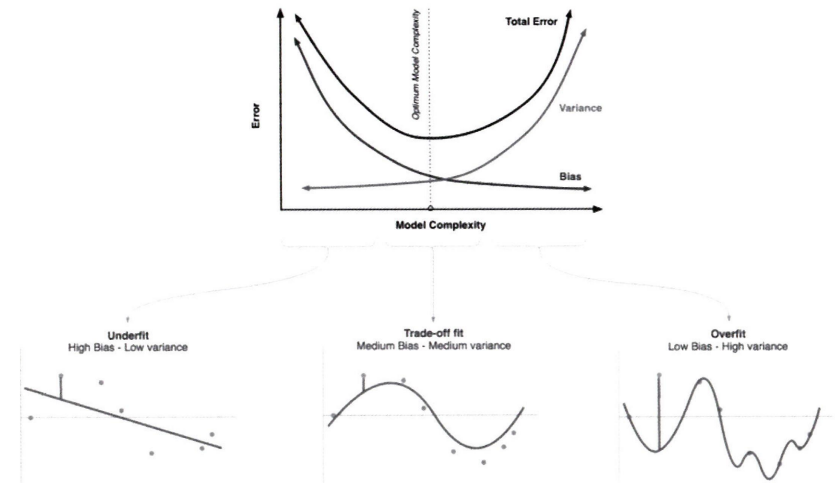